# Part-A : *EDA*

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(1)

In [11]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [12]:
df.drop_duplicates(inplace = True)

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns

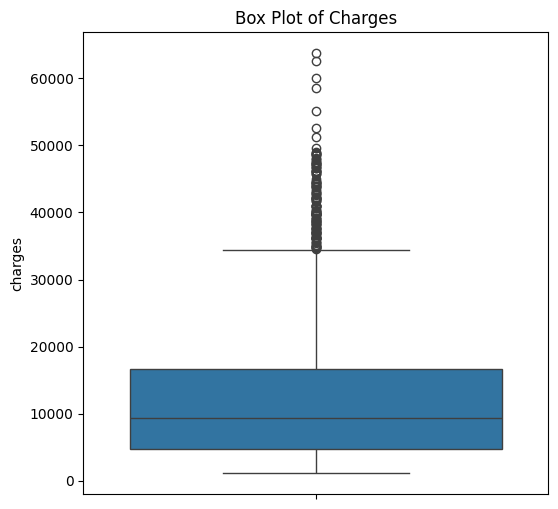

In [14]:
plt.figure(figsize=(6,6))
sns.boxplot(y=df['charges'])
plt.title("Box Plot of Charges")
plt.show()

In [15]:
df = df[df['charges'] < 50000]

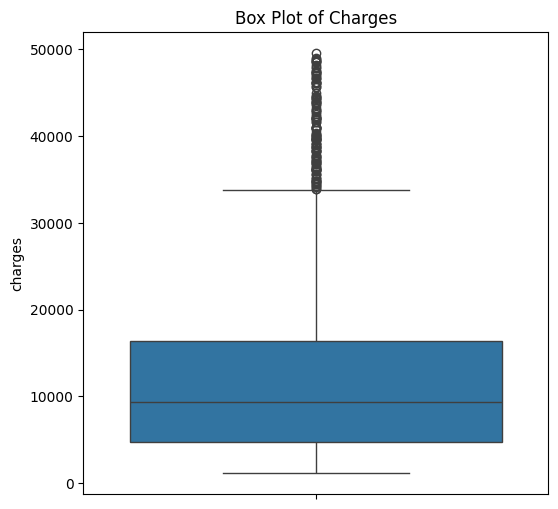

In [16]:
plt.figure(figsize=(6,6))
sns.boxplot(y=df['charges'])
plt.title("Box Plot of Charges")
plt.show()

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [19]:
df = pd.get_dummies(df , columns = ['sex', 'smoker', 'region'])

In [20]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [21]:
df = df.astype(int)

In [22]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [23]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [24]:
df.drop(columns=['sex_female' , 'smoker_no' , 'region_southwest'] , inplace=True)

In [25]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast
0,19,27,0,16884,0,1,0,0,0
1,18,33,1,1725,1,0,0,0,1
2,28,33,3,4449,1,0,0,0,1
3,33,22,0,21984,1,0,0,1,0
4,32,28,0,3866,1,0,0,1,0


In [26]:
df.dtypes

age                 int64
bmi                 int64
children            int64
charges             int64
sex_male            int64
smoker_yes          int64
region_northeast    int64
region_northwest    int64
region_southeast    int64
dtype: object

In [27]:
corr = df.corr()

In [28]:
corr

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast
age,1.000000,0.107635,0.042260,0.303853,-0.021379,-0.028943,0.003764,0.001544,-0.013911
bmi,0.107635,1.000000,0.013158,0.184743,0.049142,-0.008337,-0.139160,-0.139267,0.271680
children,0.042260,0.013158,1.000000,0.076378,0.016731,0.010746,-0.024100,0.024060,-0.021555
charges,0.303853,0.184743,0.076378,1.000000,0.058289,0.785604,0.010713,-0.042277,0.074375
sex_male,-0.021379,0.049142,0.016731,0.058289,1.000000,0.076195,0.000150,-0.012121,0.018133
smoker_yes,-0.028943,-0.008337,0.010746,0.785604,0.076195,1.000000,0.005065,-0.037870,0.068860
region_northeast,0.003764,-0.139160,-0.024100,0.010713,0.000150,0.005065,1.000000,-0.320099,-0.346340
region_northwest,0.001544,-0.139267,0.024060,-0.042277,-0.012121,-0.037870,-0.320099,1.000000,-0.345632
region_southeast,-0.013911,0.271680,-0.021555,0.074375,0.018133,0.068860,-0.346340,-0.345632,1.000000


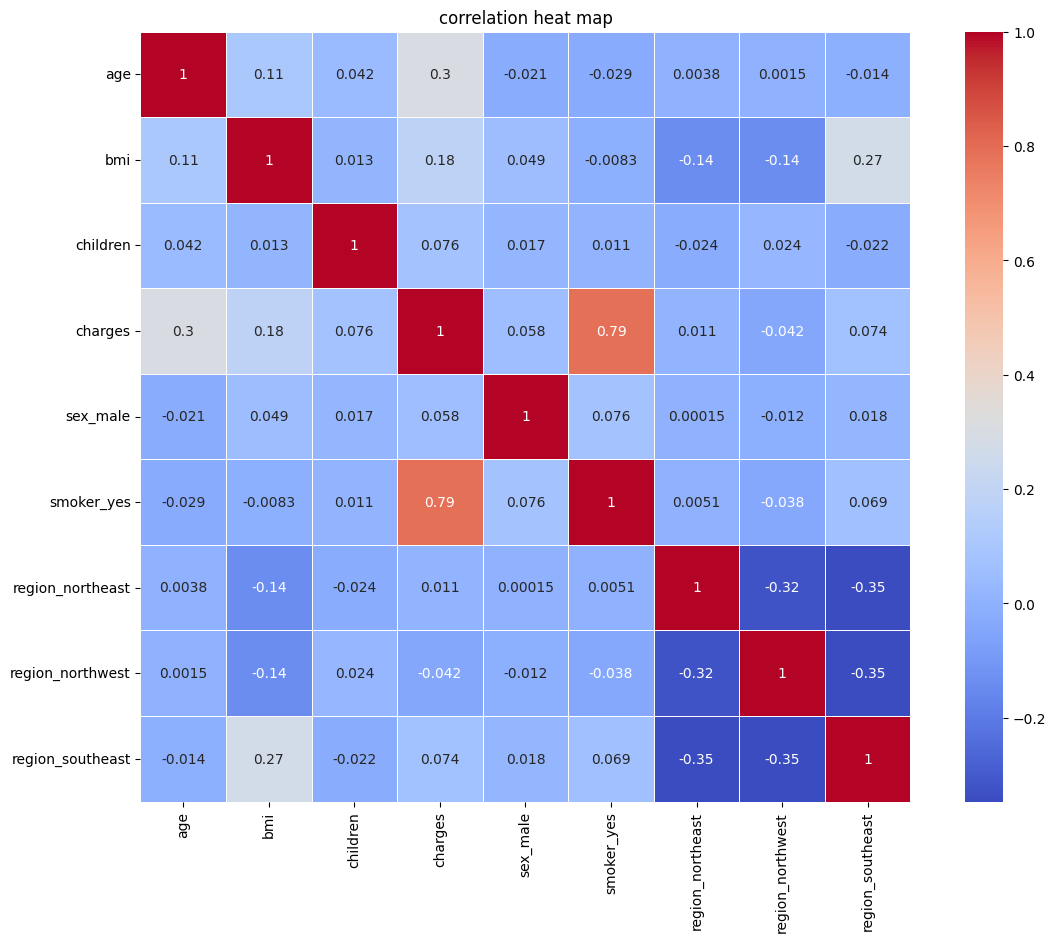

In [29]:
plt.figure(figsize=(14,10))
sns.heatmap(
    corr,
    annot=True,
    cmap = 'coolwarm',
    square = True,
    linewidths = 0.5  
)
plt.title("correlation heat map")
plt.show()

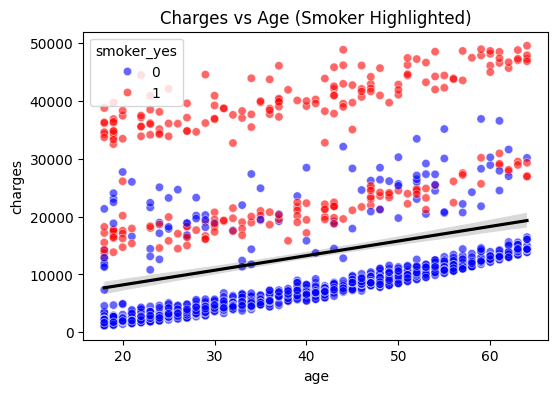

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

sns.scatterplot(
    x='age',
    y='charges',
    hue='smoker_yes',
    data=df,
    palette={0: 'blue', 1: 'red'},
    alpha=0.6
)
sns.regplot(
    x='age',
    y='charges',
    data=df,
    scatter=False,
    color='black'
)

plt.title("Charges vs Age (Smoker Highlighted)")
plt.show()


In [31]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast
0,19,27,0,16884,0,1,0,0,0
1,18,33,1,1725,1,0,0,0,1
2,28,33,3,4449,1,0,0,0,1
3,33,22,0,21984,1,0,0,1,0
4,32,28,0,3866,1,0,0,1,0


In [32]:
y = df['charges']

In [33]:
x = df.drop(columns=['charges'])

In [34]:
x.shape

(1330, 8)

y.shape

In [35]:
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast
0,19,27,0,0,1,0,0,0
1,18,33,1,1,0,0,0,1
2,28,33,3,1,0,0,0,1
3,33,22,0,1,0,0,1,0
4,32,28,0,1,0,0,1,0


In [36]:
y.head()

0    16884
1     1725
2     4449
3    21984
4     3866
Name: charges, dtype: int64

In [37]:
df.to_csv('final_data.csv')